In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml

In [2]:
# Load merged data file for the specified trading instrument
file_path = 'merged_prices.xlsx'
merged_data = pd.read_excel(file_path)

In [3]:
merged_data.head()

,CloseAsk,CloseBid,HighAsk,HighBid,LowAsk,LowBid,OpenAsk,OpenBid,Time,Median_CloseAsk,...,HighBid_10080min,LowAsk_10080min,LowBid_10080min,OpenAsk_10080min,OpenBid_10080min,Median_CloseAsk_10080min,Previous_Median,Rolling_Std,Upper_Bollinger,Lower_Bollinger
0,1.09263,1.09243,1.09263,1.09243,1.09240,1.09220,1.09241,1.09221,2024-03-11 18:50:00,NaN,...,1.0963,1.0874,1.0872,1.09692,1.09345,NaN,NaN,NaN,NaN,NaN
1,1.09253,1.09233,1.09265,1.09245,1.09247,1.09227,1.09263,1.09243,2024-03-11 18:55:00,NaN,...,1.0963,1.0874,1.0872,1.09692,1.09345,NaN,NaN,NaN,NaN,NaN
2,1.09245,1.09225,1.09254,1.09234,1.09232,1.09212,1.09252,1.09232,2024-03-11 19:00:00,NaN,...,1.0963,1.0874,1.0872,1.09692,1.09345,NaN,NaN,NaN,NaN,NaN
3,1.09255,1.09235,1.09265,1.09245,1.09239,1.09219,1.09246,1.09226,2024-03-11 19:05:00,NaN,...,1.0963,1.0874,1.0872,1.09692,1.09345,NaN,NaN,NaN,NaN,NaN
4,1.09249,1.09229,1.09264,1.09244,1.09249,1.09229,1.09255,1.09235,2024-03-11 19:10:00,NaN,...,1.0963,1.0874,1.0872,1.09692,1.09345,NaN,NaN,NaN,NaN,NaN


In [4]:
merged_data.columns

Index(['CloseAsk', 'CloseBid', 'HighAsk', 'HighBid', 'LowAsk', 'LowBid',
       'OpenAsk', 'OpenBid', 'Time', 'Median_CloseAsk', 'CloseAsk_1440min',
       'CloseBid_1440min', 'HighAsk_1440min', 'HighBid_1440min',
       'LowAsk_1440min', 'LowBid_1440min', 'OpenAsk_1440min',
       'OpenBid_1440min', 'Median_CloseAsk_1440min', 'CloseAsk_10080min',
       'CloseBid_10080min', 'HighAsk_10080min', 'HighBid_10080min',
       'LowAsk_10080min', 'LowBid_10080min', 'OpenAsk_10080min',
       'OpenBid_10080min', 'Median_CloseAsk_10080min', 'Previous_Median',
       'Rolling_Std', 'Upper_Bollinger', 'Lower_Bollinger'],
      dtype='object')

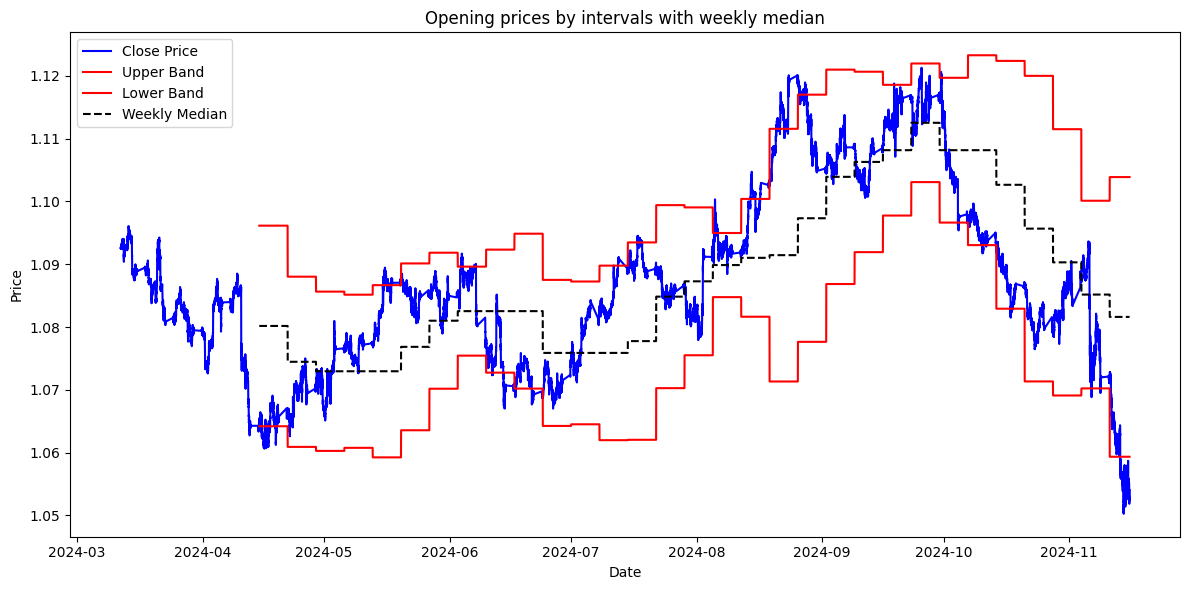

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Time'], merged_data['CloseAsk'], label='Close Price', color='blue')

plt.plot(merged_data['Time'], merged_data['Upper_Bollinger'], label='Upper Band', color='red')
plt.plot(merged_data['Time'], merged_data['Lower_Bollinger'], label='Lower Band', color='red')
plt.plot(merged_data['Time'], merged_data['Median_CloseAsk_10080min'], label='Weekly Median', linestyle='--', color='black')

# Add titles and labels
plt.title(f"Opening prices by intervals with weekly median")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd

# Ensure 'Time' column is in datetime format and remove timezone information if any
merged_data['Time'] = pd.to_datetime(merged_data['Time']).dt.tz_localize(None)

# Retrieve the latest date and weekly median values
last_date = merged_data["Time"].iloc[-1]
last_value = merged_data["Median_CloseAsk_10080min"].iloc[-1]

previous_median_value = merged_data["Previous_Median"].iloc[-1]

last_upper_band = merged_data["Upper_Bollinger"].iloc[-1]
last_lower_band = merged_data["Lower_Bollinger"].iloc[-1]

# Display results
print("Last data date:", last_date)
print("Current median value:", last_value)
print("Previous median value:", previous_median_value)
print("The value of the upper band:", last_upper_band)
print("The value of the bottom band:", last_lower_band)


Last data date: 2024-11-15 21:55:00
Current median value: 1.08161
Previous median value: 1.08517
The value of the upper band: 1.10389
The value of the bottom band: 1.05933
